<a href="https://colab.research.google.com/github/park-geun-hyeong/RNN_PRACTICE/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.datasets import imdb

In [49]:
(x_train,y_train),(x_test,y_test)=imdb.load_data()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [50]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(25000,) (25000,) (25000,) (25000,)


(array([12500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

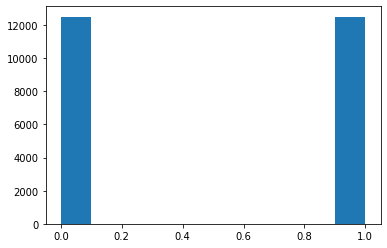

In [51]:
plt.hist(y_train)

2494


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


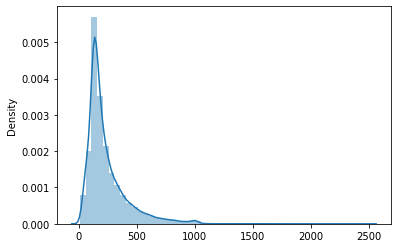

In [52]:
print(max(len(i) for i in x_train))
sns.distplot([len(i) for i in x_train])

In [53]:
len_result= [len(i) for i in x_train]

print("max: {}".format(max(len_result)))
print("mean: {}".format(np.mean(len_result)))

max: 2494
mean: 238.71364


In [54]:
y_series=pd.Series(y_train)
y_series.value_counts()

1    12500
0    12500
dtype: int64

In [55]:
word_to_index=imdb.get_word_index()
index_to_word={}

for key, value in word_to_index.items():
    index_to_word[value+3]=key

In [56]:
index_to_word[4]

'the'

In [57]:
for index, token in enumerate(('<pad>','<sos>','<unk>')):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))


<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [58]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, GRU, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [59]:
vocab_size=10000

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words= vocab_size)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [60]:
max_len=500

x_train_pad = pad_sequences(x_train, maxlen=max_len)
x_test_pad = pad_sequences(x_test, maxlen=max_len)

In [61]:
x_train_pad.shape, x_test_pad.shape

((25000, 500), (25000, 500))

In [62]:
model=Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

In [68]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc=ModelCheckpoint('GRU_model.h5',monitor='val_acc', mode='max', verbose=1, save_best_only=True )

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               88320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,088,449
Trainable params: 1,088,449
Non-trainable params: 0
_________________________________________________________________


In [65]:
history= model.fit(x_train_pad, y_train, epochs=10, batch_size=64, callbacks=[es,mc], validation_data=(x_test_pad,y_test))

Epoch 1/15
391/391 [==============================] - 426s 1s/step - loss: 0.5798 - acc: 0.6806 - val_loss: 0.3542 - val_acc: 0.8478
Epoch 2/15
391/391 [==============================] - 423s 1s/step - loss: 0.2776 - acc: 0.8883 - val_loss: 0.3173 - val_acc: 0.8653
Epoch 3/15
391/391 [==============================] - 421s 1s/step - loss: 0.1750 - acc: 0.9356 - val_loss: 0.3337 - val_acc: 0.8707
Epoch 4/15
391/391 [==============================] - 423s 1s/step - loss: 0.1231 - acc: 0.9570 - val_loss: 0.3499 - val_acc: 0.8731
Epoch 5/15
391/391 [==============================] - 422s 1s/step - loss: 0.0754 - acc: 0.9751 - val_loss: 0.3876 - val_acc: 0.8672
Epoch 6/15
391/391 [==============================] - 419s 1s/step - loss: 0.0500 - acc: 0.9838 - val_loss: 0.4785 - val_acc: 0.8710
Epoch 7/15
391/391 [==============================] - 419s 1s/step - loss: 0.0328 - acc: 0.9900 - val_loss: 0.5134 - val_acc: 0.8569
Epoch 8/15
391/391 [==============================] - 421s 1s/step - 

In [66]:
model.evaluate(x_test_pad,y_test)

782/782 [==============================] - 82s 104ms/step - loss: 0.8494 - acc: 0.8620


[0.8493674397468567, 0.8620399832725525]

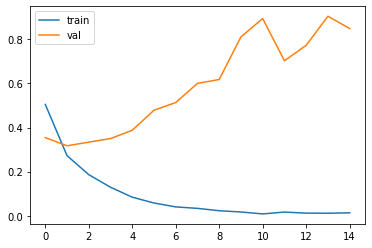

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'],loc='upper left')
plt.show()


In [76]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

  # 정수 인코딩
    encoded = []
    for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한.
        try :
            if word_to_index[word] <= 10000:
                encoded.append(word_to_index[word]+3)
            else:
    # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
                encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 취급.
        except KeyError:
             encoded.append(2)

    pad_new = pad_sequences([encoded], maxlen = max_len) 
    score = float(model.predict(pad_new)) 
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [93]:
#IMDB AVATAR영화를 통해서 실제로 리뷰평가 해보기

In [77]:
text='Avatar tells a familiar story but its a story that works so well inside of this movie. The visuals and 3d are still one of the best to date and i totally get why it made so much money.'

In [78]:
sentiment_predict(text)

99.84% 확률로 긍정 리뷰입니다.


In [83]:
text2='I saw AVATAR today. It was a boiling 40 degrees Celsius in Australia. I caught a bus and train to get there. I spent months on a forum before that. Incremental stops included a scriptment, stills, a teaser, a foot, AVATAR day and a full trailer. Now released I have had many reviews to read which have been mostly very positive.'

In [84]:
sentiment_predict(text2)

100.00% 확률로 긍정 리뷰입니다.


In [89]:
text3="It's been 12 years since we last saw James Cameron's visionary directing on the big screen. He previously graced Our Cinemas with the Likes of The Terminator, Aliens and the rather popular titanic. The latter went on to gross more than 1.8 billion dollars worldwide and bag 11 Oscar's. Now he's back with another epic, Avatar. It's been 12 years in the making, now it is being realised in glorious 3-D."

In [90]:
sentiment_predict(text3)

84.52% 확률로 긍정 리뷰입니다.


In [91]:
t4="I had high expectations going into Avatar. Now I admit, it's probably stupid to go into any movie with expectations that are too high, lest they be crushed. However, even without high expectations, Avatar impresses only on a technical level, and on that level only. The story is very predictable, and as I watched this movie I was overcome with a feeling as if I had seen this all before in something in a made for TV movie on SyFy. This is pretty bad considering this is the same guy who made The Abyss and Terminator. I can only say that if you go see this movie, expect beautiful visuals... and a standard humdrum story that you've seen before if you follow any number of science fiction TV shows or just sci-fi in general. Oh, and if this is the 22nd century, why are they still using manually propelled wheelchairs?"

In [92]:
sentiment_predict(t4)

100.00% 확률로 부정 리뷰입니다.
